# Author: Sridharan Chandran
# Project Name: AutoServOptimize

# Objective:
Company X is collaborating with an automotive service chain to optimize the launch of its new grand service station. The station aims to provide a free service check for all arriving cars on its launch day. However, with an unexpected influx of 450 cars and a daily capacity to check only 315 cars, there is a need for an efficient solution. The service personnel cannot work beyond regular hours, making it imperative for the data analysts, specifically the AIML Engineer, to develop a solution that expedites the process of identifying cars in need of servicing.

## Challenge:
The challenge is to develop a machine learning model that can predict whether a car requires servicing based on measurable attributes. The model should alleviate the burden of manual inspection by quickly categorizing cars into those needing service and those that don't.

## Data:
Two datasets, namely 'serviceTrainData' and 'serviceTestData', have been provided. These datasets include attributes related to oil quality, engine performance, normal mileage, tire wear, HVAC wear, and the ultimate service requirement label (service needed or not).

## Project Scope:
The primary scope is to build a robust machine learning classification model that, when provided with car attributes, can accurately predict the need for servicing. The model should be trained on the 'serviceTrainData' and validated on the 'serviceTestData'.

## Evaluation Criteria:
The success of the AIML Engineer's solution will be evaluated based on the model's accuracy in predicting service requirements on the provided test data.

## Deliverables:
Developed machine learning classification model.
Model validation on the 'serviceTestData'.
Documentation outlining the model's architecture, training process, and validation results.

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# file paths
train_data_path = r'C:/Users/Admin/Desktop/Anubavam Task/serviceTrainData.csv'
test_data_path = r'C:/Users/Admin/Desktop/Anubavam Task/serviceTestData.csv'


In [3]:
# Load datasets
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [4]:
train_data.head()

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Service
0,103.388821,103.504032,103.051485,106.172658,105.686843,No
1,26.765516,26.188265,31.259536,29.186162,31.311275,Yes
2,62.413282,63.681061,59.720883,64.704031,58.620518,Yes
3,45.533338,49.906615,48.777581,48.113851,47.952072,No
4,104.388821,103.284032,103.051485,105.822658,106.536843,No


In [5]:
test_data.head()

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Service
0,45.773338,49.936615,49.777581,48.263851,50.952072,No
1,4.987185,7.891003,6.588986,9.493161,3.240262,No
2,4.987185,4.891003,7.308986,8.373161,2.780262,No
3,106.388821,104.454032,103.051485,106.282658,105.536843,No
4,104.388821,103.744032,103.051485,106.132658,105.776843,No


In [6]:
train_data.dtypes

OilQual        float64
EnginePerf     float64
NormMileage    float64
TyreWear       float64
HVACwear       float64
Service         object
dtype: object

In [7]:
test_data.dtypes

OilQual        float64
EnginePerf     float64
NormMileage    float64
TyreWear       float64
HVACwear       float64
Service         object
dtype: object

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OilQual      315 non-null    float64
 1   EnginePerf   315 non-null    float64
 2   NormMileage  315 non-null    float64
 3   TyreWear     315 non-null    float64
 4   HVACwear     315 non-null    float64
 5   Service      315 non-null    object 
dtypes: float64(5), object(1)
memory usage: 14.9+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OilQual      135 non-null    float64
 1   EnginePerf   135 non-null    float64
 2   NormMileage  135 non-null    float64
 3   TyreWear     135 non-null    float64
 4   HVACwear     135 non-null    float64
 5   Service      135 non-null    object 
dtypes: float64(5), object(1)
memory usage: 6.5+ KB


In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
OilQual,315.0,59.649297,37.702113,0.987185,26.765516,59.663282,104.388821,106.428821
EnginePerf,315.0,60.305574,37.143496,1.891003,27.418265,59.741061,103.744032,105.744032
NormMileage,315.0,60.297214,35.980773,3.358986,31.259536,57.220883,103.051485,105.051485
TyreWear,315.0,61.758983,37.063963,6.213161,29.036162,60.304031,106.172658,108.172658
HVACwear,315.0,60.394734,38.571413,-1.719738,31.336275,60.620518,105.536843,107.536843


In [11]:
train_data.isnull().sum()

OilQual        0
EnginePerf     0
NormMileage    0
TyreWear       0
HVACwear       0
Service        0
dtype: int64

In [12]:
train_data.nunique()

OilQual        144
EnginePerf     150
NormMileage    150
TyreWear       148
HVACwear       134
Service          2
dtype: int64

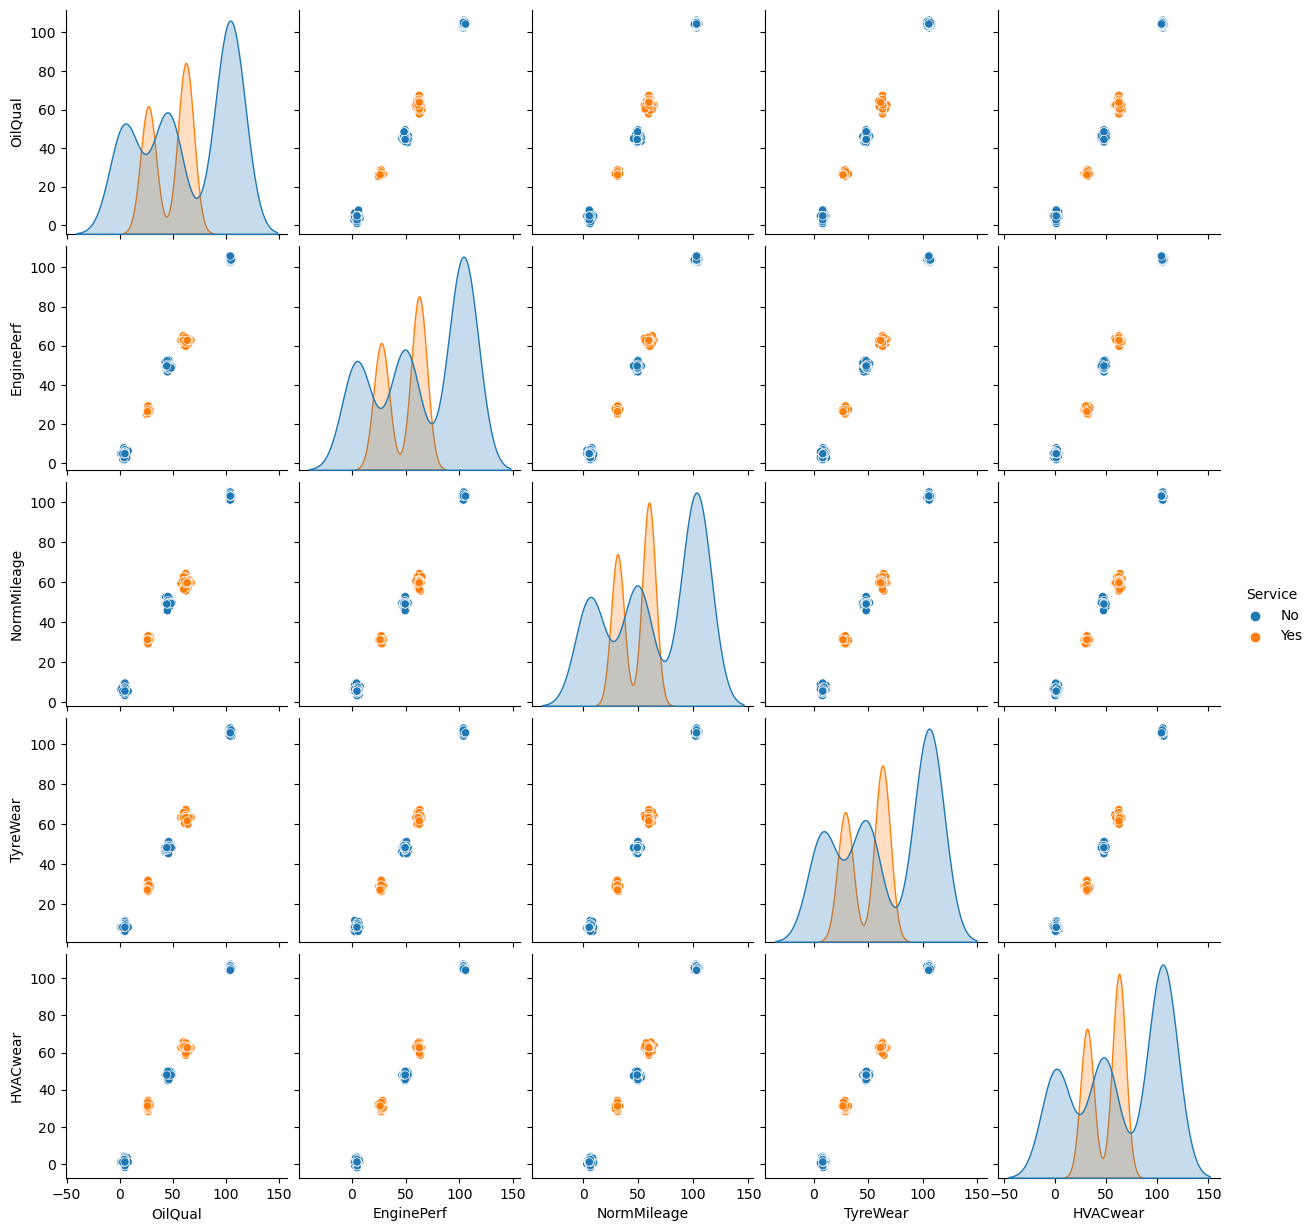

In [13]:
# EDA - Univariate Analysis
sns.pairplot(train_data, hue='Service', diag_kind='kde')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17312\43491697.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


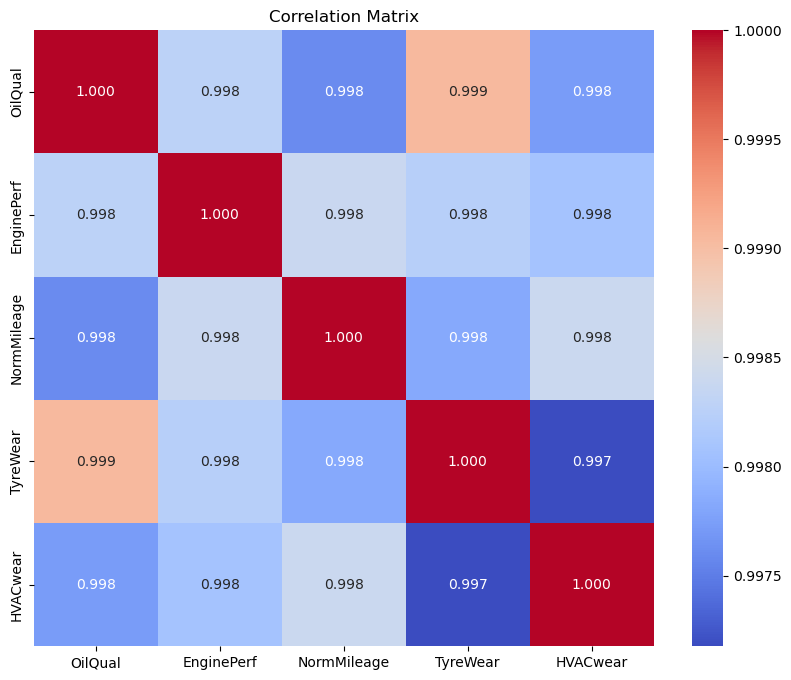

In [14]:
# EDA - Multivariate Analysis Visualize the Correlation Matrix

# Calculate the correlation matrix
corr_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

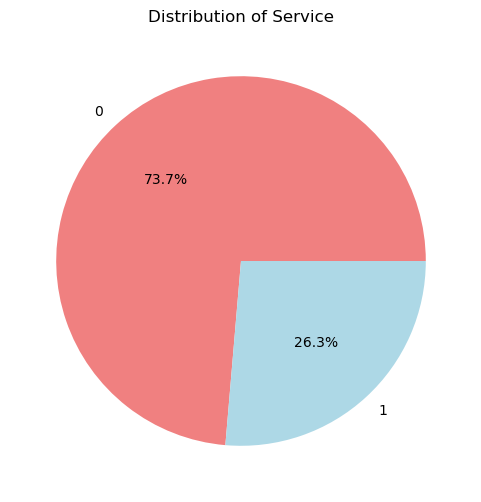

In [31]:
#'Service' is the categorical variable to visualize
service_distribution = train_data['Service'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(service_distribution, labels=service_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Service')
plt.show()

In [15]:
# Data Preprocessing
# Convert 'Service' column to binary labels (0 for 'No' and 1 for 'Yes')
train_data['Service'] = train_data['Service'].apply(lambda x: 0 if x == 'No' else 1)
test_data['Service'] = test_data['Service'].apply(lambda x: 0 if x == 'No' else 1)

# Separate features and target variable
X_train = train_data.drop('Service', axis=1)
y_train = train_data['Service']
X_test = test_data.drop('Service', axis=1)
y_test = test_data['Service']

In [16]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Model Training
model = RandomForestClassifier()

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=50)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test_scaled)

# Model Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Compare Model Performance (RandomForest and GradientBoosting)
from sklearn.ensemble import GradientBoostingClassifier

# Another model for comparison
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# Model Comparison Metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("\nComparison with Gradient Boosting Classifier:")
print(f'Random Forest Accuracy: {accuracy}, Gradient Boosting Accuracy: {accuracy_gb}')
print(f'Random Forest Precision: {precision}, Gradient Boosting Precision: {precision_gb}')
print(f'Random Forest Recall: {recall}, Gradient Boosting Recall: {recall_gb}')
print(f'Random Forest F1 Score: {f1}, Gradient Boosting F1 Score: {f1_gb}')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Comparison with Gradient Boosting Classifier:
Random Forest Accuracy: 1.0, Gradient Boosting Accuracy: 1.0
Random Forest Precision: 1.0, Gradient Boosting Precision: 1.0
Random Forest Recall: 1.0, Gradient Boosting Recall: 1.0
Random Forest F1 Score: 1.0, Gradient Boosting F1 Score: 1.0


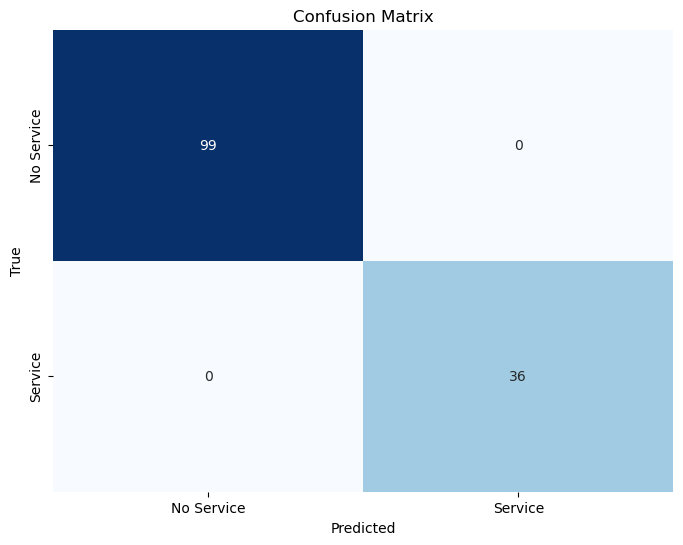

In [19]:
# Confusion Matrix for the Best Model
cm = confusion_matrix(y_test, y_pred_best)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Service', 'Service'],
            yticklabels=['No Service', 'Service'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
# Upsample the minority class to handle class imbalance
X_train_balanced, y_train_balanced = resample(X_train_scaled[y_train == 1], y_train[y_train == 1],
                                              replace=True, n_samples=X_train_scaled[y_train == 0].shape[0],
                                              random_state=42)
X_train_balanced = np.concatenate((X_train_scaled[y_train == 0], X_train_balanced))
y_train_balanced = np.concatenate((y_train[y_train == 0], y_train_balanced))

In [21]:
# Build the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

In [24]:
# Train the model
history = model.fit(X_train_balanced, y_train_balanced, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stop])

Epoch 1/50
15/15 [==============================] - 2s 37ms/step - loss: 0.7629 - accuracy: 0.5172 - val_loss: 0.6970 - val_accuracy: 0.4519
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.4806 - val_loss: 0.5530 - val_accuracy: 0.7556
Epoch 3/50
15/15 [==============================] - 0s 11ms/step - loss: 0.6127 - accuracy: 0.6379 - val_loss: 0.4841 - val_accuracy: 0.8963
Epoch 4/50
15/15 [==============================] - 0s 12ms/step - loss: 0.5675 - accuracy: 0.7522 - val_loss: 0.4537 - val_accuracy: 0.9037
Epoch 5/50
15/15 [==============================] - 0s 13ms/step - loss: 0.5615 - accuracy: 0.7478 - val_loss: 0.4212 - val_accuracy: 0.9037
Epoch 6/50
15/15 [==============================] - 0s 13ms/step - loss: 0.5235 - accuracy: 0.7888 - val_loss: 0.4063 - val_accuracy: 0.9037
Epoch 7/50
15/15 [==============================] - 0s 16ms/step - loss: 0.5307 - accuracy: 0.7457 - val_loss: 0.3964 - val_accuracy: 0.7926
Epoch 8/50
15/

In [25]:
# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

5/5 [==============================] - 0s 5ms/step


In [26]:
# Convert to 1D array
y_pred = y_pred.flatten()

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78 21]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        99
           1       0.63      1.00      0.77        36

    accuracy                           0.84       135
   macro avg       0.82      0.89      0.83       135
weighted avg       0.90      0.84      0.85       135



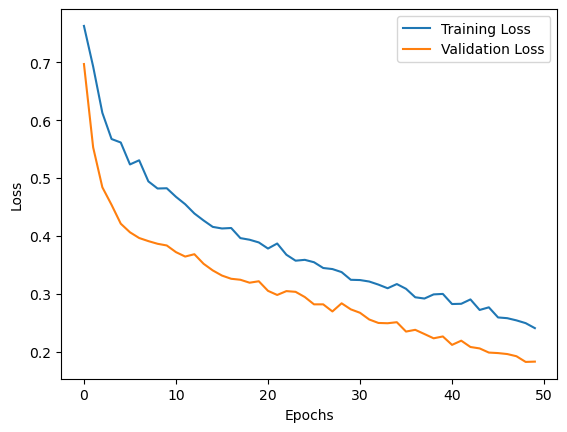

In [27]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# Save the best model for deployment
import joblib

joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [29]:
# Load the saved model
loaded_model = joblib.load('best_model.pkl')

In [30]:
loaded_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}